<h1><center>In the name of Allah</center></h1>

Import Tools

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [71]:
uber_df = pd.read_csv('Data/uber.csv')

In [72]:
uber_df.head(10)

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,27:09.0,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,04:00.0,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,52:00.0,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,32:00.0,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,06:00.0,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


In [73]:
uber_df.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


<ul>
  <li><b>key</b>: a unique identifier for each trip</li>
  <li><b>fare_amount</b>: the cost of each trip in usd <b>(target)</b></li>
  <li><b>pickup_datetime</b>: date and time when the meter was engaged</li>
  <li><b>pickup_datetime</b>: date and time when the meter was engaged</li>
  <li><b>passenger_count</b>: the number of passengers in the vehicle (driver entered value)</li>
  <li><b>pickup_longitude</b>: the longitude where the meter was engaged</li>
  <li><b>pickup_latitude</b>: the latitude where the meter was engaged</li>
  <li><b>dropoff_longitude</b>: the longitude where the meter was disengaged</li>
  <li><b>dropoff_latitude</b>: the latitude where the meter was disengaged</li>
</ul>

In [74]:
uber_df = uber_df.dropna()
uber_df = uber_df.drop_duplicates()

In [75]:
uber_df = uber_df[np.all(uber_df.loc[:,'pickup_longitude':'dropoff_latitude'] != 0, axis=1)].reset_index(drop=True)

In [76]:
uber_df['pickup_datetime'] = pd.to_datetime(uber_df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S %Z')

In [77]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196031 entries, 0 to 196030
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   index              196031 non-null  int64              
 1   key                196031 non-null  object             
 2   fare_amount        196031 non-null  float64            
 3   pickup_datetime    196031 non-null  datetime64[ns, UTC]
 4   pickup_longitude   196031 non-null  float64            
 5   pickup_latitude    196031 non-null  float64            
 6   dropoff_longitude  196031 non-null  float64            
 7   dropoff_latitude   196031 non-null  float64            
 8   passenger_count    196031 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.5+ MB


In [78]:
from sklearn.metrics.pairwise import haversine_distances

pickup_rad = np.radians(uber_df[['pickup_latitude', 'pickup_longitude']])
dropoff_rad = np.radians(uber_df[['dropoff_latitude', 'dropoff_longitude']])
distance = np.zeros(uber_df.shape[0])
for i in np.arange(uber_df.shape[0]):
    distance[i] = haversine_distances([pickup_rad.iloc[i,:],dropoff_rad.iloc[i,:]]) [0,1]

distance_in_km = distance * 6371.009

In [79]:
uber_df['haver_dist'] = distance_in_km

In [80]:
uber_df['man_dist'] = np.abs(uber_df['pickup_longitude'] - uber_df['dropoff_longitude']) +\
      np.abs(uber_df['pickup_latitude'] - uber_df['dropoff_latitude'])

In [81]:
uber_df.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haver_dist,man_dist
count,1.960310e+05,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000
mean,2.771193e+07,11.343009,-73.930055,40.705591,-73.917108,40.688590,1.685228,4.773461,0.118236
std,1.600944e+07,9.799572,5.449368,5.426844,8.518210,3.994266,1.388150,94.110088,10.650143
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000
25%,1.383107e+07,6.000000,-73.992268,40.736396,-73.991592,40.735265,1.000000,1.255521,0.016404
50%,2.774864e+07,8.500000,-73.982101,40.753287,-73.980521,40.753726,1.000000,2.156637,0.028153
75%,4.154481e+07,12.500000,-73.968313,40.767542,-73.965316,40.768326,2.000000,3.910226,0.050822
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.262316,3270.155787


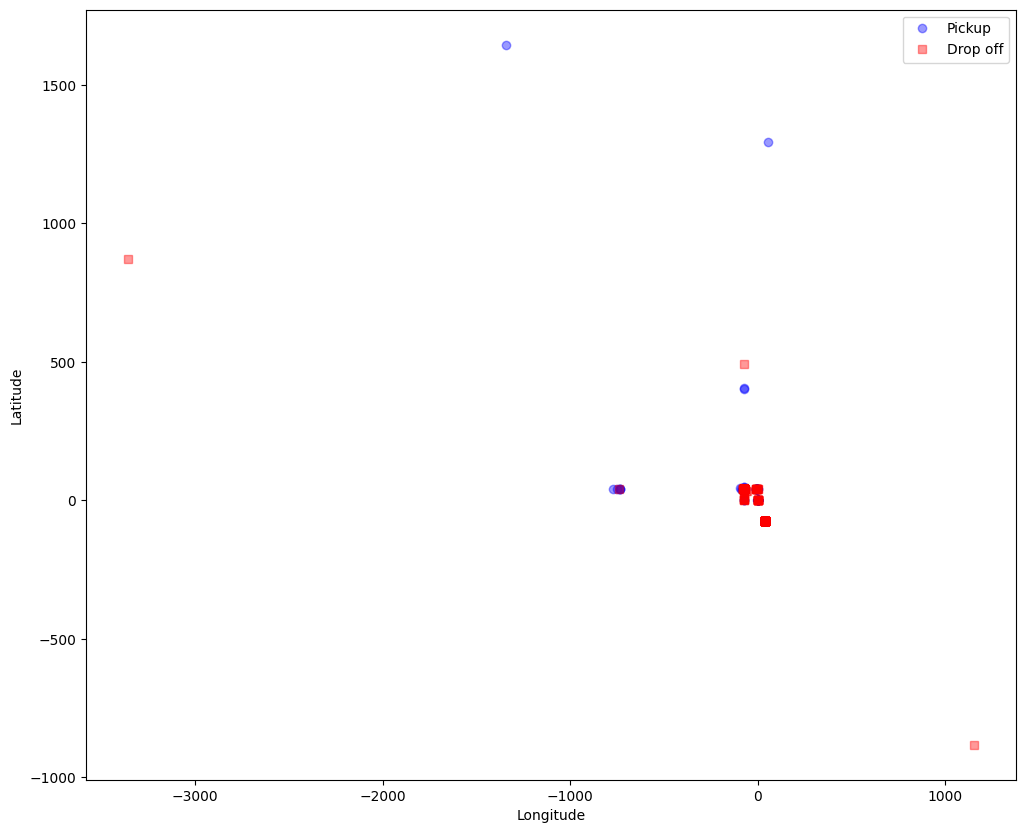

In [82]:
plt.figure(figsize=(12,10))
plt.plot(uber_df['pickup_longitude'],uber_df['pickup_latitude'],'bo',label = 'Pickup',alpha=0.4)
plt.plot(uber_df['dropoff_longitude'],uber_df['dropoff_latitude'],'rs',label='Drop off',alpha=0.4)
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude');

<Figure size 640x480 with 0 Axes>

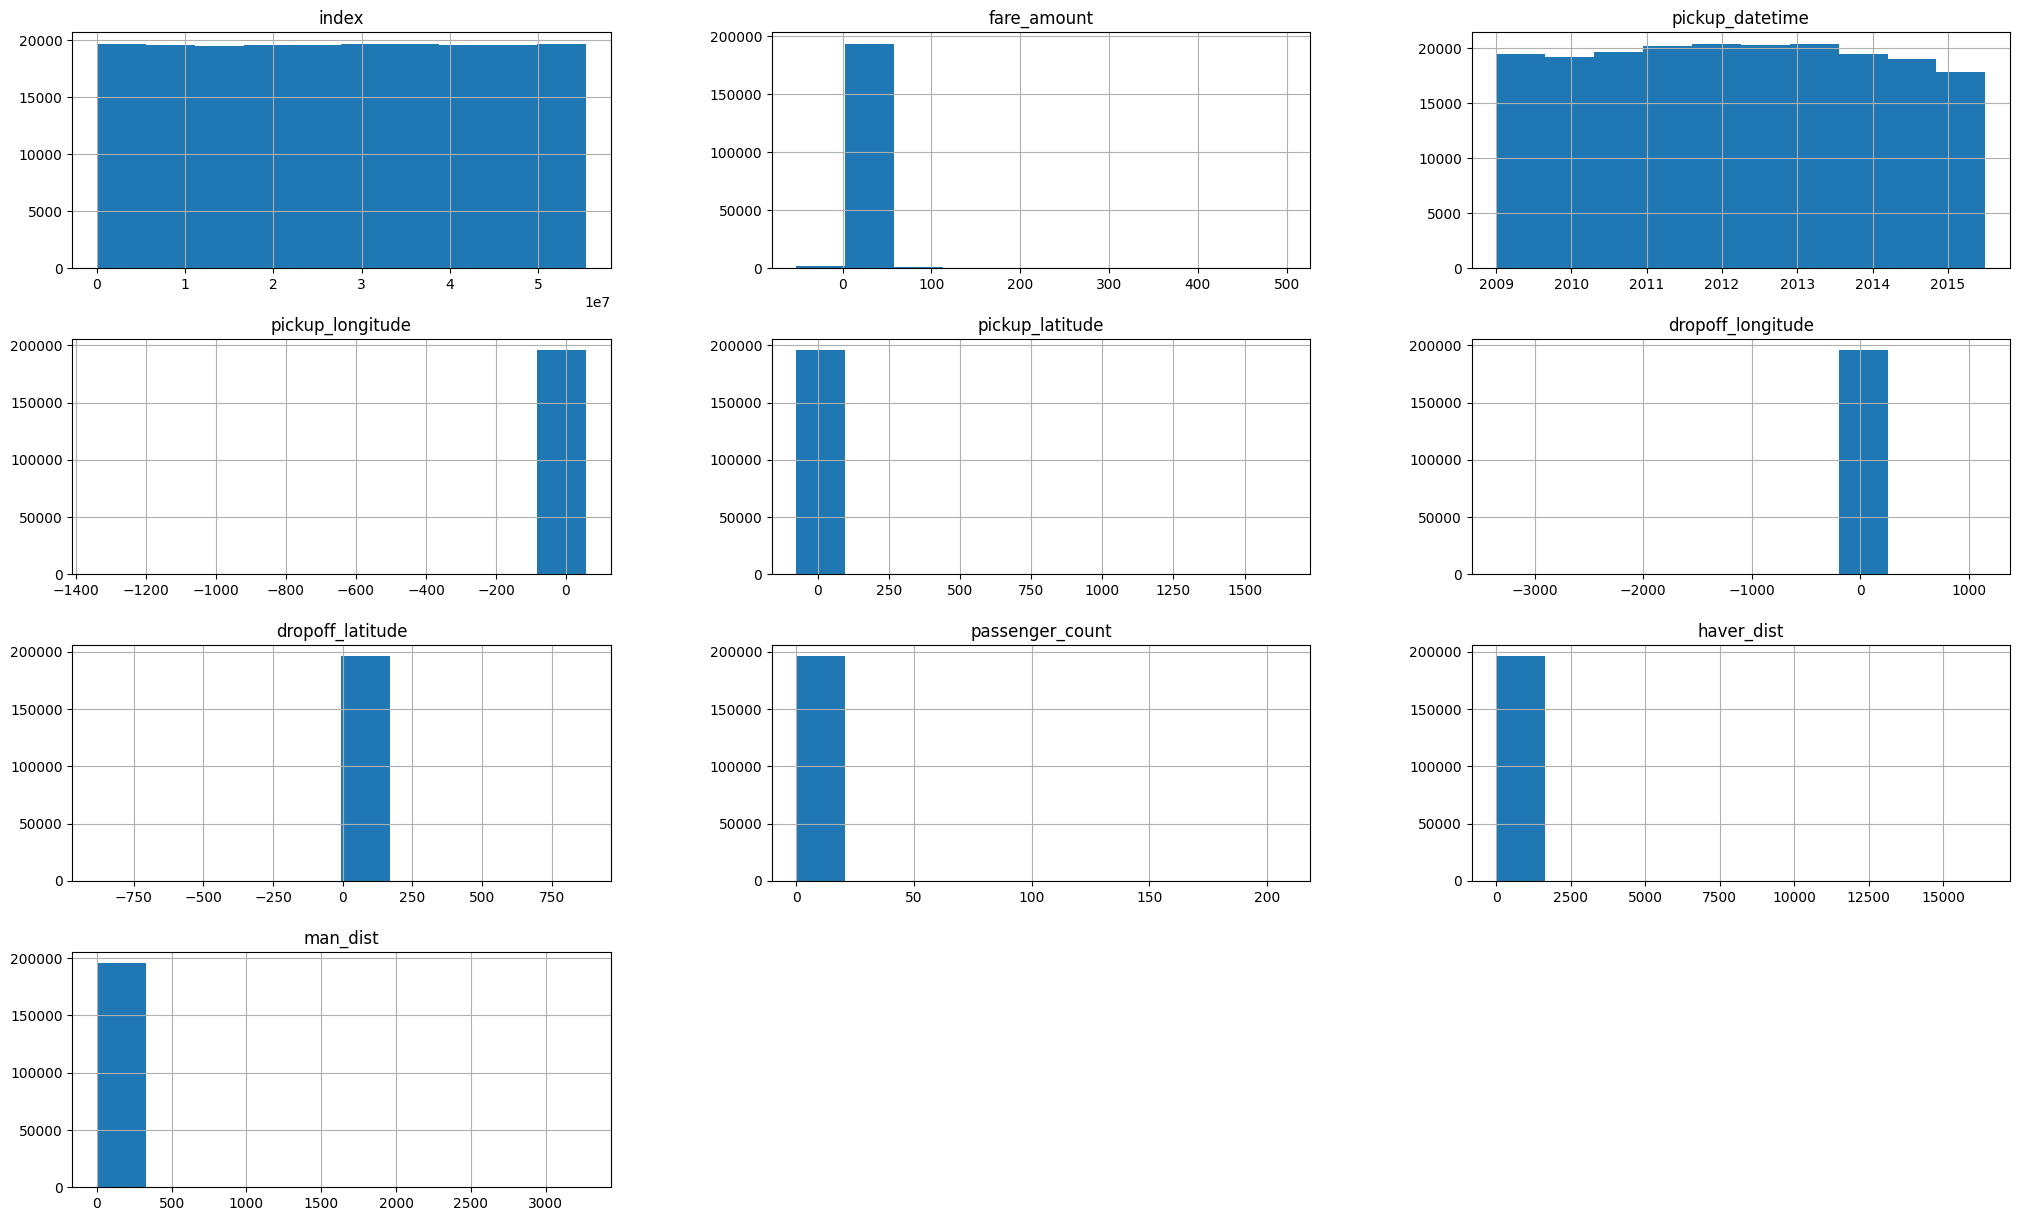

In [83]:
plt.figure()
uber_df.hist(figsize=(25,15));

In [84]:
uber_df = uber_df[(uber_df['haver_dist'] <= 20) & (uber_df['haver_dist'] >= 0.05)]
uber_df = uber_df[(uber_df['fare_amount'] >= 1) & (uber_df['fare_amount'] <= 100)]
uber_df = uber_df[uber_df['passenger_count'] <= 6]

uber_df = uber_df[['fare_amount','haver_dist','man_dist','pickup_datetime','passenger_count']]

In [85]:
uber_df['pickup_year'] = uber_df['pickup_datetime'].dt.year
uber_df['pickup_month'] = uber_df['pickup_datetime'].dt.month
uber_df['pickup_day'] = uber_df['pickup_datetime'].dt.day
uber_df['pickup_hr'] = uber_df['pickup_datetime'].dt.hour
uber_df['pickup_min'] = uber_df['pickup_datetime'].dt.minute

In [86]:
uber_df['pickup_time'] = (uber_df['pickup_hr']*60 + uber_df['pickup_min']) / 60

In [87]:
uber_df['pickup_time_frac'] = uber_df['pickup_hr'] / 23

In [88]:
uber_df.describe()

,fare_amount,haver_dist,man_dist,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hr,pickup_min,pickup_time,pickup_time_frac
count,190606.000000,190606.000000,190606.000000,190606.000000,190606.000000,190606.000000,190606.000000,190606.000000,190606.000000,190606.000000,190606.000000
mean,10.783571,3.139977,0.041277,1.683824,2011.743025,6.278664,15.705996,13.492372,29.528121,13.984507,0.586625
std,8.097859,2.976335,0.040524,1.307754,1.859418,3.442021,8.686069,6.523576,17.337550,6.530378,0.283634
min,2.500000,0.050318,0.000533,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.281083,0.016728,1.000000,2010.000000,3.000000,8.000000,9.000000,14.000000,9.400000,0.391304
50%,8.500000,2.162359,0.028222,1.000000,2012.000000,6.000000,16.000000,14.000000,30.000000,14.633333,0.608696
75%,12.500000,3.846683,0.049920,2.000000,2013.000000,9.000000,23.000000,19.000000,45.000000,19.533333,0.826087
max,100.000000,19.998337,0.307202,6.000000,2015.000000,12.000000,31.000000,23.000000,59.000000,23.983333,1.000000


In [89]:
uber_df['log_fare_amount'] = np.log(uber_df['fare_amount'])
uber_df['log_haver_dist'] = np.log(uber_df['haver_dist'])
uber_df['log_man_dist'] = np.log(uber_df['man_dist'])

<Figure size 640x480 with 0 Axes>

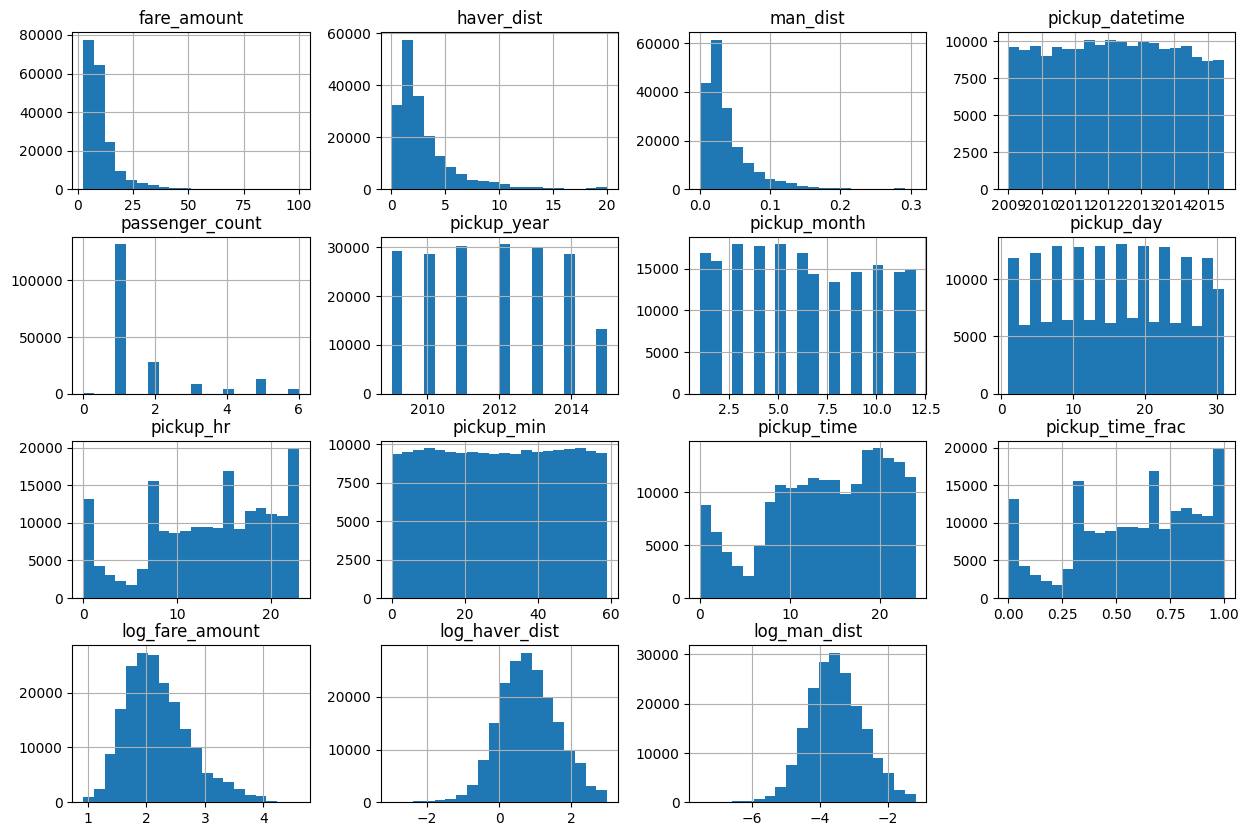

In [90]:
plt.figure()
uber_df.hist(figsize=(15,10), bins=20);

In [91]:
uber_df = uber_df.drop(['fare_amount','haver_dist','man_dist','pickup_year','pickup_month','pickup_hr','pickup_min'], axis=1)
uber_df

,pickup_datetime,passenger_count,pickup_day,pickup_time,pickup_time_frac,log_fare_amount,log_haver_dist,log_man_dist
0,2015-05-07 19:52:06+00:00,1,7,19.866667,0.826087,2.014903,0.520771,-4.170671
1,2009-07-17 20:04:56+00:00,1,17,20.066667,0.869565,2.041220,0.899183,-3.796242
2,2009-08-24 21:45:00+00:00,1,24,21.750000,0.913043,2.557227,1.616688,-2.598904
3,2009-06-26 08:22:21+00:00,3,26,8.366667,0.347826,1.667707,0.507833,-3.758744
4,2014-08-28 17:47:00+00:00,5,28,17.783333,0.739130,2.772589,1.498608,-2.729974
...,...,...,...,...,...,...,...,...
196026,2012-10-28 10:49:00+00:00,1,28,10.816667,0.434783,1.098612,-2.187380,-6.538263
196027,2014-03-14 01:09:00+00:00,1,14,1.150000,0.043478,2.014903,0.628637,-3.699617
196028,2009-06-29 00:42:00+00:00,2,29,0.700000,0.000000,3.430756,2.553370,-1.655697
196029,2015-05-20 14:56:25+00:00,1,20,14.933333,0.608696,2.674149,1.264048,-3.124809


In [92]:
uber_df['day_of_week'] = uber_df['pickup_datetime'].dt.day_of_week # Monday,...

In [93]:
uber_df['n_week'] = (uber_df['pickup_day'] - 1) // 7 + 1 # Weeks in a month: 1, 2, 3, 4, 5

In [94]:
uber_df

,pickup_datetime,passenger_count,pickup_day,pickup_time,pickup_time_frac,log_fare_amount,log_haver_dist,log_man_dist,day_of_week,n_week
0,2015-05-07 19:52:06+00:00,1,7,19.866667,0.826087,2.014903,0.520771,-4.170671,3,1
1,2009-07-17 20:04:56+00:00,1,17,20.066667,0.869565,2.041220,0.899183,-3.796242,4,3
2,2009-08-24 21:45:00+00:00,1,24,21.750000,0.913043,2.557227,1.616688,-2.598904,0,4
3,2009-06-26 08:22:21+00:00,3,26,8.366667,0.347826,1.667707,0.507833,-3.758744,4,4
4,2014-08-28 17:47:00+00:00,5,28,17.783333,0.739130,2.772589,1.498608,-2.729974,3,4
...,...,...,...,...,...,...,...,...,...,...
196026,2012-10-28 10:49:00+00:00,1,28,10.816667,0.434783,1.098612,-2.187380,-6.538263,6,4
196027,2014-03-14 01:09:00+00:00,1,14,1.150000,0.043478,2.014903,0.628637,-3.699617,4,2
196028,2009-06-29 00:42:00+00:00,2,29,0.700000,0.000000,3.430756,2.553370,-1.655697,0,5
196029,2015-05-20 14:56:25+00:00,1,20,14.933333,0.608696,2.674149,1.264048,-3.124809,2,3


In [95]:
uber_df = uber_df.reset_index(drop=True)

In [96]:
uber_df = uber_df.drop(['pickup_datetime'],axis=1)

In [97]:
uber_df = uber_df.drop(['pickup_day'], axis=1)

In [98]:
uber_df.describe()

,passenger_count,pickup_time,pickup_time_frac,log_fare_amount,log_haver_dist,log_man_dist,day_of_week,n_week
count,190606.000000,190606.000000,190606.000000,190606.000000,190606.000000,190606.000000,190606.000000,190606.000000
mean,1.683824,13.984507,0.586625,2.196331,0.804506,-3.535477,3.049668,2.695991
std,1.307754,6.530378,0.283634,0.563321,0.824707,0.830717,1.945730,1.255247
min,0.000000,0.000000,0.000000,0.916291,-2.989384,-7.536989,0.000000,1.000000
25%,1.000000,9.400000,0.391304,1.791759,0.247706,-4.090671,1.000000,2.000000
50%,1.000000,14.633333,0.608696,2.140066,0.771200,-3.567669,3.000000,3.000000
75%,2.000000,19.533333,0.826087,2.525729,1.347211,-2.997339,5.000000,4.000000
max,6.000000,23.983333,1.000000,4.605170,2.995649,-1.180250,6.000000,5.000000


<Axes: >

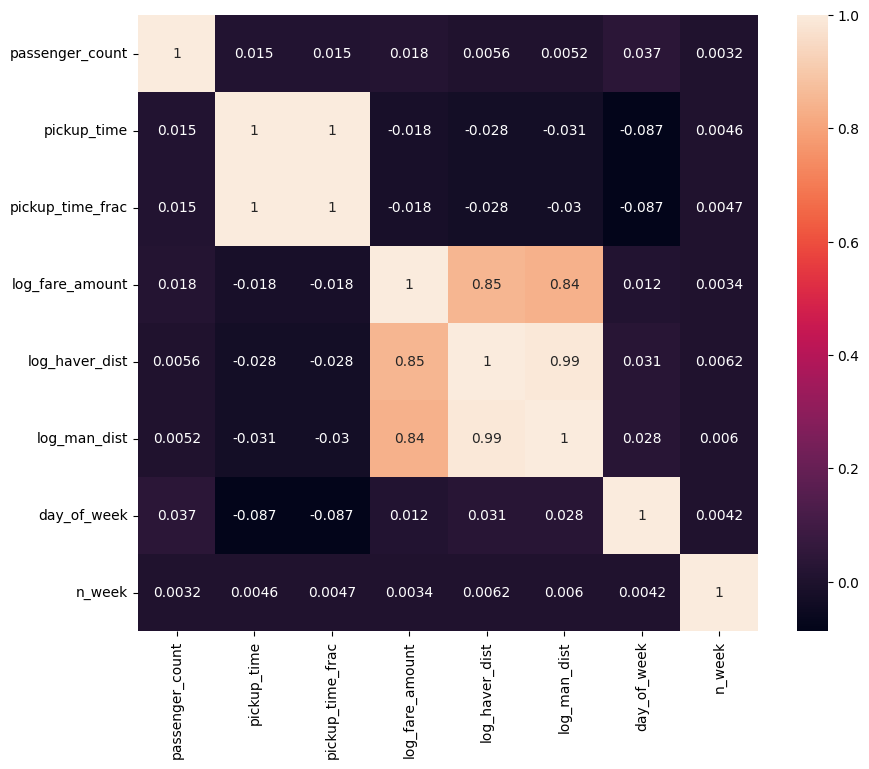

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(uber_df.corr(method='pearson'), annot=True)

In [100]:
uber_df = uber_df.drop(['log_man_dist','pickup_time_frac'], axis=1)

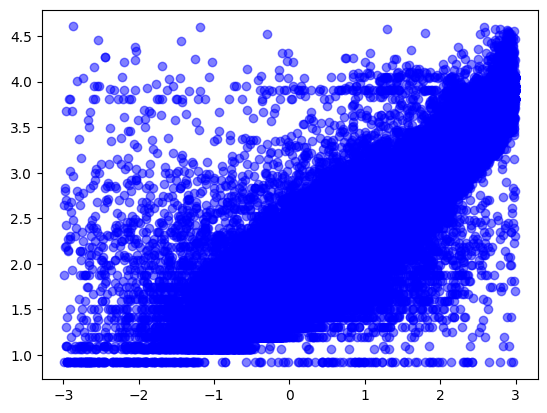

In [101]:
plt.figure()
plt.plot(uber_df['log_haver_dist'],uber_df['log_fare_amount'],'bo',alpha=0.5)

In [102]:
uber_df

,passenger_count,pickup_time,log_fare_amount,log_haver_dist,day_of_week,n_week
0,1,19.866667,2.014903,0.520771,3,1
1,1,20.066667,2.041220,0.899183,4,3
2,1,21.750000,2.557227,1.616688,0,4
3,3,8.366667,1.667707,0.507833,4,4
4,5,17.783333,2.772589,1.498608,3,4
...,...,...,...,...,...,...
190601,1,10.816667,1.098612,-2.187380,6,4
190602,1,1.150000,2.014903,0.628637,4,2
190603,2,0.700000,3.430756,2.553370,0,5
190604,1,14.933333,2.674149,1.264048,2,3


In [103]:
uber_df.describe()

,passenger_count,pickup_time,log_fare_amount,log_haver_dist,day_of_week,n_week
count,190606.000000,190606.000000,190606.000000,190606.000000,190606.000000,190606.000000
mean,1.683824,13.984507,2.196331,0.804506,3.049668,2.695991
std,1.307754,6.530378,0.563321,0.824707,1.945730,1.255247
min,0.000000,0.000000,0.916291,-2.989384,0.000000,1.000000
25%,1.000000,9.400000,1.791759,0.247706,1.000000,2.000000
50%,1.000000,14.633333,2.140066,0.771200,3.000000,3.000000
75%,2.000000,19.533333,2.525729,1.347211,5.000000,4.000000
max,6.000000,23.983333,4.605170,2.995649,6.000000,5.000000


In [104]:
uber_df = uber_df.drop(['passenger_count'],axis=1)
#! For try: use the column if needed

Modeling

In [105]:
X = uber_df.drop('log_fare_amount', axis=1)
y = uber_df['log_fare_amount']

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, shuffle=True, random_state=42, stratify=uber_df[['day_of_week','n_week']])

In [107]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [109]:
from sklearn.preprocessing import OneHotEncoder
train_one_hot = OneHotEncoder(sparse_output=False)
train_enc = train_one_hot.fit_transform(X_train[['day_of_week','n_week']])
train_enc

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [110]:
X_train = X_train.drop(['n_week','day_of_week'], axis=1)

In [112]:
from sklearn.preprocessing import MinMaxScaler

normal_scaler = MinMaxScaler()
X_train = normal_scaler.fit_transform(X_train)

In [132]:
X_train = np.hstack([X_train, train_enc])

In [114]:
# train_one_hot = pd.DataFrame(train_one_hot,columns=one_hot_enc.get_feature_names_out(X_train[['day_of_week','n_week']].columns))
# X_train = pd.concat([X_train.drop(['day_of_week','n_week'],axis=1), train_one_hot],axis=1)

In [115]:
# X_train_n = pd.DataFrame(X_train_n, columns=X_train.drop(['is_weekend'], axis=1).columns)
# X_train_n = pd.concat([X_train_n, X_train['is_weekend']], axis=1)

In [116]:
# X_train = X_train_n

In [117]:
# X_test_n = normal_scaler.transform(X_test.drop(['is_weekend'], axis=1))
# X_test_n = pd.DataFrame(X_test_n, columns=X_test.drop(['is_weekend'], axis=1).columns)
# X_test_n = pd.concat([X_test_n, X_test['is_weekend']], axis=1)
# X_test = X_test_n

DT

In [135]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


dt = DecisionTreeRegressor(random_state=42)
params = {'max_depth': [5, 6, 7, 8, 9 , 11],
          'min_samples_split': [2, 3, 5, 10],
          'min_samples_leaf': [5, 10, 25, 30]}
grid = GridSearchCV(estimator=dt, param_grid=params, cv=5,
                    scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 11],
                         'min_samples_leaf': [5, 10, 25, 30],
                         'min_samples_split': [2, 3, 5, 10]},
             scoring='neg_mean_squared_error')

In [136]:
grid.best_params_

{'max_depth': 8, 'min_samples_leaf': 25, 'min_samples_split': 2}

In [137]:
grid.best_score_

-0.06900480051676783

In [138]:
best_dt_mdl = grid.best_estimator_

In [139]:
yhat_train = best_dt_mdl.predict(X_train)

In [141]:
from sklearn.metrics import mean_squared_error,r2_score

mse_train = mean_squared_error(np.exp(y_train),np.exp(yhat_train))
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(np.exp(y_train),np.exp(yhat_train))
print(f'{mse_train = }, {rmse_train = }, {r2_train = }')

mse_train = 14.46028395764775, rmse_train = 3.802668005183696, r2_train = 0.7802128416502269


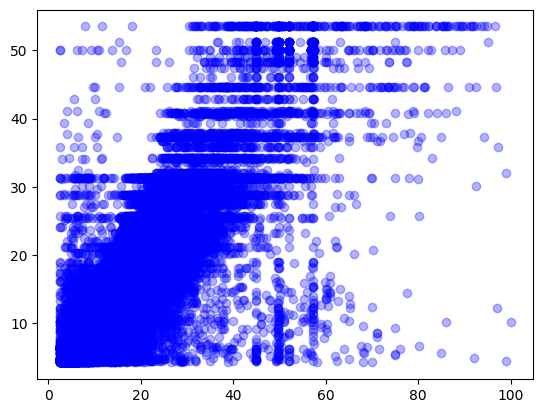

In [142]:
plt.figure()
plt.plot(np.exp(y_train), np.exp(yhat_train), 'bo', alpha=0.3,label='Train')

In [143]:
best_dt_mdl.feature_importances_

array([1.08218018e-02, 9.87466841e-01, 1.73779944e-05, 1.98295232e-05,
       6.81009756e-05, 2.03408229e-05, 3.49648194e-05, 2.09684667e-04,
       1.25229619e-03, 1.86666333e-05, 3.32925684e-05, 0.00000000e+00,
       3.68027294e-05, 0.00000000e+00])

In [124]:
# yhat_test = best_dt_mdl.predict(X_test)

In [125]:
# mse_test = mean_squared_error(np.exp(y_test),np.exp(yhat_test))
# rmse_test = np.sqrt(mse_test)
# r2_test = r2_score(np.exp(y_test),np.exp(yhat_test))
# print(f'{mse_test = }, {rmse_test = }, {r2_test=}')

In [126]:
# plt.figure()
# plt.plot(np.exp(y_train), np.exp(yhat_train), 'bo', alpha=0.3,label='Train')
# plt.plot(np.exp(y_test), np.exp(yhat_test), 'rs', alpha=0.3,label='Test')
# plt.plot([0,100],[0,100],'k--',label='EQ Line')
# plt.xlim((0, 100))
# plt.ylim((0, 100))
# plt.legend();
# plt.xlabel('Actual')
# plt.ylabel('Predicted')

In [127]:
# best_dt_mdl.feature_importances_

In [128]:
# best_dt_mdl.feature_names_in_